In [1]:
 from MechFinder import MechFinder
finder = MechFinder(collection_dir='collections')

# Finding mechanism for single reaction

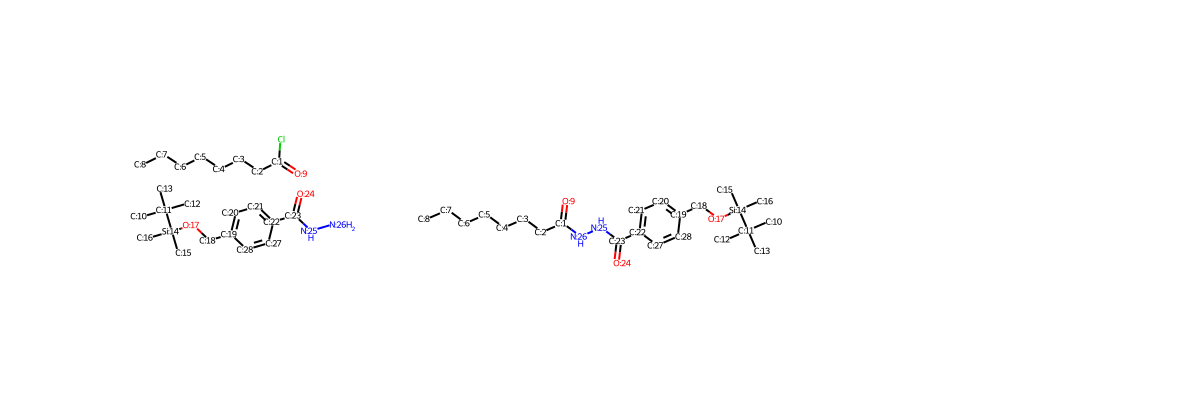

In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
sampled_rxns = pd.read_csv('data/samples.csv')['reaction'].tolist() # randomly sampled reactions
sampled_rxn = np.random.choice(sampled_rxns, 1)[0]
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in  sampled_rxn.split('>>')], subImgSize=(400, 400))

Identified mechanistic class: nucleophilic_attack_to_(thio)carbonyl_or_sulfonyl
Generated mechanism: [(26, 1), ([1, 9], 9), (9, [9, 1]), ([1, 101], 101)]


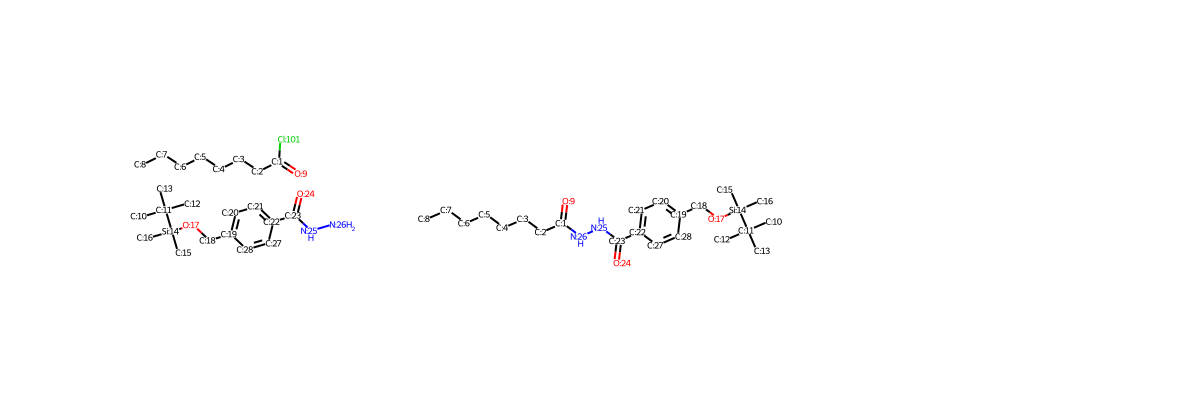

In [3]:
updated_reaction, LRT, MT_class, electron_path = finder.get_electron_path(sampled_rxn)
print ('Identified mechanistic class:', MT_class)
print ('Generated mechanism:', electron_path)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in  updated_reaction.split('>>')], subImgSize=(400, 400))

# Finding mechanism for a reaction dataset

In [4]:
from tqdm import tqdm
from collections import defaultdict

dataset_rxns = pd.read_csv('data/USPTO_33K.csv')
original_reactions = []
updated_reactions = []
mechanistic_classes = []
mechanistic_labels = []

for rxn in tqdm(dataset_rxns['reaction'], total=len(dataset_rxns)):
    updated_rxn, LRT, MT_class, electron_path = finder.get_electron_path(rxn)
    if not isinstance(finder.check_exception(MT_class), str):
        original_reactions.append(rxn)
        updated_reactions.append(updated_rxn)
        mechanistic_classes.append(MT_class)
        mechanistic_labels.append(electron_path)
        
print ('Labeled %d reactions.' % len(updated_reactions))

100%|███████████████████████████████████████████████████████████████████████████| 33099/33099 [04:46<00:00, 115.42it/s]

Labeled 31364 reactions.


In [7]:
labeled_df = pd.DataFrame({
    'original_reactions': original_reactions, 
    'updated_reaction': updated_reactions, 
    'mechanistic_class': mechanistic_classes,
    'mechanistic_label': mechanistic_labels
    })
labeled_df.to_csv('data/mech-USPTO-31k.csv', index=None)